Nesse script, geramos os ids necessários para acender qualquer um dos clusters que vamos desenhar no canvas. Ele funciona procurando as *N* imagens mais próximas de determinada imagem.

#### Importação de pacotes

In [1]:
from matplotlib import pyplot as plt
import math
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline

#### Lê e reúne os arquivos

In [2]:
DF = pd.read_csv("../output/tsne-2019-08-16_13-45.csv")

METADATA = pd.read_csv("../data/prado/museo-del-prado_Pintura.tsv", sep = "\t")

METADATA.columns = [ "autor", 
                     "dimensao",
                     "data", 
                     "img", 
                     "procedencia", 
                     "serie", 
                     "suporte", 
                     "tipo", 
                     "tecnica",
                     "titulo",
                     "url",
                     "local" ]

DF = DF.merge(METADATA, on = 'img')

In [3]:
def get_n_closest_images(data, img, n = None):
    '''
    Retorna um dataframe com as 'n' pinturas mais próximas 
    daquela cujo id foi passado na variável 'img'. Se n não
    for passado, retorna o dataframe inteiro.
    '''
    
    def compute_distance(row, coords):
        '''
        Computa a distância entre o ponto x1,y1
        da linha em questão e o ponto x2,y2 que
        foi passada na variável coords.
        '''

        distance = math.sqrt( (row.x_pos - coords["x_pos"])**2 + (row.y_pos - coords["y_pos"])**2 )

        return pd.Series({
            "distance" : distance
        })
    
    # Seleciona a imagem e reindexa
    temp = data [ data.img == img ]
    assert temp.shape[0] == 1
    temp = temp.reset_index()
    
    # Faz uma cópia da variável data para evitar mudanças inplace
    dists = data.copy()
    
    # Calcula a distância em relação às coordenadas da iamgem
    coords = { "x_pos" : temp.loc[0, 'x_pos'], "y_pos" : temp.loc[0, 'y_pos'] }
    dists["distance"] = dists.apply(compute_distance, args = [coords], axis = 1)
    
    # Reordena para que as obras fiquem em ordem de distância
    dists = dists.sort_values(by = "distance")
    
    if n is not None:
        dists = dists.head(n)
    
    return dists

In [4]:
def get_bbox(df):
    '''
    Obtém uma bounding box ao extrair as coordenadas xMin,
    xMax, yMin e yMax de um dataframe. Esse valor também
    será necessário para que as imagens sejam geradas
    proporcionamente no canvas.
    '''
    
    bbox = {
        "x0" : df.x_pos.min(),
        "x1" : df.x_pos.max(),
        "y0" : df.y_pos.min(),
        "y1" : df.y_pos.max()
    }
    
    return bbox

#### Gerar clusters

Imagem da nuvem de quadrados com opacidade alta

In [5]:
pass

Imagem da nuvem de palavras com baixa opacidade. Las meninas aparece em destaque. 

In [6]:
print(DF [ DF.titulo == "Las meninas"].img.tolist())

['P001174']


Imagem das 50 pinturas que rodeiam "As Meninas" em destaque

In [7]:
print(get_n_closest_images(DF, "P001174", 50).img.to_list())

['P001174', 'P000248', 'P003087', 'P006735', 'P006402', 'P005935', 'P007693', 'P004837', 'P005913', 'P005616', 'P006337', 'P003265', 'P006674', 'P003488', 'P006035', 'P007994', 'P001514', 'P006513', 'P005908', 'P007606', 'P004652', 'P004653', 'P005902', 'P001331', 'P005907', 'P001329', 'P004669', 'P007605', 'P005721', 'P003468', 'P004636', 'P001805', 'P005706', 'P007788', 'P001918', 'P006455', 'P006165', 'P004826', 'P004274', 'P004335', 'P007134', 'P005373', 'P007789', 'P008060', 'P005365', 'P000068', 'P006802', 'P004825', 'P003361', 'P007396']


In [8]:
get_bbox(get_n_closest_images(DF, "P001174", 50))

{'x0': 0.52455705, 'x1': 0.5851392, 'y0': 0.32898578, 'y1': 0.3903768}

Imagem da nuvem inteira com destaque para as obras de Goya.

In [9]:
print(DF [ DF.autor == "Goya y Lucientes, Francisco de"].img.to_list())

['P002862', 'P000734', 'P000720', 'P002447', 'P000721', 'P002650', 'P000735', 'P007112', 'P007853', 'P004194', 'P002524', 'P005539', 'P007070', 'P000723', 'P000737', 'P002450', 'P000736', 'P000722', 'P007461', 'P000726', 'P000732', 'P007713', 'P000733', 'P007857', 'P007102', 'P000731', 'P002898', 'P000725', 'P000719', 'P000724', 'P000730', 'P002899', 'P007856', 'P000804', 'P000794', 'P000780', 'P000757', 'P000743', 'P000742', 'P000756', 'P000781', 'P000795', 'P002784', 'P000805', 'P002547', 'P000783', 'P000797', 'P007775', 'P000768', 'P000740', 'P000754', 'P000755', 'P000741', 'P007748', 'P003260', 'P000769', 'P000796', 'P000782', 'P002546', 'P002783', 'P000802', 'P000786', 'P000792', 'P000745', 'P000751', 'P000779', 'P000778', 'P000750', 'P000744', 'P000793', 'P000787', 'P000803', 'P002782', 'P003113', 'P000801', 'P000791', 'P000785', 'P006323', 'P000752', 'P000746', 'P007767', 'P000753', 'P000784', 'P000790', 'P000800', 'P002781', 'P000789', 'P007794', 'P000776', 'P000762', 'P000763'

In [10]:
get_bbox(DF)

{'x0': 0.0, 'x1': 1.0, 'y0': 0.0, 'y1': 1.0}

Imagem de toda a nuvem com as obras de Carlos de Haes em destaque.

In [11]:
print(DF [ DF.autor == "Haes, Carlos de"].img.to_list())

['P004817', 'P007488', 'P007477', 'P004383', 'P004368', 'P005670', 'P006379', 'P005658', 'P007503', 'P007517', 'P006152', 'P007516', 'P005659', 'P006378', 'P005671', 'P004369', 'P004382', 'P007476', 'P004816', 'P006024', 'P006597', 'P004380', 'P006540', 'P005667', 'P005673', 'P007064', 'P007514', 'P003983', 'P006151', 'P007515', 'P005672', 'P006541', 'P004381', 'P006596', 'P004391', 'P007698', 'P004385', 'P005845', 'P006155', 'P007511', 'P007505', 'P007504', 'P007510', 'P004384', 'P006593', 'P004390', 'P004190', 'P004386', 'P004379', 'P005846', 'P005649', 'P006156', 'P007506', 'P007512', 'P007513', 'P007507', 'P005660', 'P005674', 'P005648', 'P004378', 'P004387', 'P006023', 'P006252', 'P006865', 'P006871', 'P004055', 'P004054', 'P005362', 'P006870', 'P006864', 'P006537', 'P006872', 'P006866', 'P004056', 'P006867', 'P006873', 'P006536', 'P006877', 'P004053', 'P004052', 'P006876', 'P006731', 'P005776', 'P006874', 'P004051', 'P006875', 'P005777', 'P006703', 'P007555', 'P006702', 'P007391'

In [12]:
get_bbox(DF)

{'x0': 0.0, 'x1': 1.0, 'y0': 0.0, 'y1': 1.0}

Entra imagem em zoom das 600 obras nos entornos de “La canal de Mancorbo" ("P004390"], com algumas pinturas em destaque.

In [13]:
print(get_n_closest_images(DF, "P004390", 500).img.to_list())

['P004390', 'P006202', 'P005660', 'P006865', 'P003914', 'P006877', 'P006223', 'P004371', 'P007485', 'P005669', 'P006377', 'P004495', 'P004496', 'P007344', 'P007504', 'P005738', 'P006538', 'P007556', 'P006868', 'P005656', 'P007391', 'P007902', 'P004192', 'P006652', 'P007892', 'P005707', 'P004173', 'P005552', 'P006537', 'P004250', 'P005658', 'P005362', 'P001612', 'P004388', 'P007447', 'P004386', 'P004176', 'P002176', 'P002175', 'P005651', 'P007040', 'P007480', 'P004346', 'P003896', 'P002310', 'P004244', 'P001378', 'P007083', 'P001854', 'P001741', 'P006994', 'P007890', 'P006499', 'P004242', 'P004677', 'P004247', 'P006686', 'P004222', 'P005688', 'P007053', 'P005652', 'P006597', 'P004519', 'P001662', 'P006536', 'P006761', 'P008031', 'P000079', 'P003911', 'P004749', 'P007339', 'P004375', 'P001745', 'P007165', 'P006867', 'P004254', 'P007511', 'P003696', 'P004683', 'P006869', 'P004331', 'P006225', 'P005659', 'P005671', 'P003984', 'P007512', 'P005653', 'P008112', 'P004055', 'P006864', 'P007479'

In [14]:
get_bbox(get_n_closest_images(DF, "P004390", 500))

{'x0': 0.5787218000000001, 'x1': 0.7498068, 'y0': 0.63608027, 'y1': 0.8267331}

Mostra zoom na região dos retratos. Aqui, vamos definir a zona de recorte cardinalmente, com duas bounding boxes

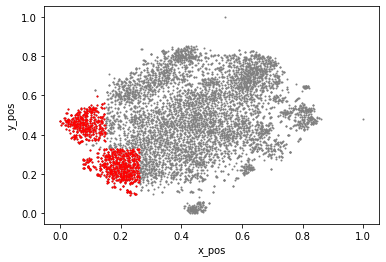

In [15]:
ax = DF.plot(kind='scatter', x='x_pos', y='y_pos', s=1, color='grey')

DF [  ( (DF.x_pos < 0.262) & (DF.y_pos < 0.33) ) |
      ( (DF.x_pos < 0.15) & (DF.y_pos < 0.6)  & (DF.y_pos > 0.36))
].plot(ax=ax, kind='scatter', x='x_pos', y='y_pos', color='red', s=1)

In [16]:
print(DF [  ( (DF.x_pos < 0.262) & (DF.y_pos < 0.33) ) |
      ( (DF.x_pos < 0.15) & (DF.y_pos < 0.6)  & (DF.y_pos > 0.35))
].img.tolist())

['P002296', 'P003188', 'P002282', 'P006769', 'P004624', 'P000442', 'P004142', 'P002241', 'P007846', 'P003413', 'P005704', 'P001562', 'P002725', 'P002862', 'P002876', 'P003201', 'P000052', 'P000734', 'P002651', 'P002889', 'P008142', 'P006621', 'P003759', 'P004036', 'P002447', 'P002446', 'P005473', 'P000292', 'P006813', 'P000721', 'P006350', 'P004547', 'P002644', 'P005842', 'P002693', 'P006556', 'P008235', 'P003406', 'P003412', 'P001205', 'P006581', 'P000443', 'P000325', 'P005513', 'P003162', 'P002297', 'P001978', 'P002281', 'P000469', 'P007460', 'P002518', 'P007474', 'P003174', 'P000327', 'P002530', 'P004141', 'P007845', 'P002097', 'P003404', 'P007662', 'P005713', 'P003362', 'P001561', 'P003410', 'P007886', 'P002732', 'P004586', 'P002108', 'P005115', 'P000045', 'P002134', 'P000723', 'P005897', 'P000051', 'P006805', 'P000521', 'P002450', 'P000247', 'P006622', 'P008168', 'P003029', 'P000520', 'P001158', 'P006179', 'P000050', 'P000722', 'P002109', 'P002690', 'P002848', 'P002874', 'P003405'

In [17]:
get_bbox(DF [  ( (DF.x_pos < 0.25) & (DF.y_pos < 0.33) ) |
      ( (DF.x_pos < 0.15) & (DF.y_pos < 0.6)  & (DF.y_pos > 0.36))
])

{'x0': 0.0,
 'x1': 0.24960805,
 'y0': 0.09288975599999999,
 'y1': 0.5946720999999999}

Mostra zoom nas naturezas-mortas (220 mais próximas de P000910)

In [28]:
print(get_n_closest_images(DF, "P000910", 220).img.to_list())

['P000910', 'P000913', 'P000919', 'P000930', 'P000926', 'P000927', 'P000936', 'P000917', 'P000914', 'P000925', 'P000909', 'P000937', 'P000931', 'P000911', 'P000928', 'P000924', 'P000921', 'P007910', 'P000922', 'P000920', 'P007916', 'P007610', 'P001622', 'P006941', 'P000935', 'P003306', 'P002072', 'P001606', 'P000916', 'P006942', 'P007941', 'P001504', 'P000906', 'P007920', 'P000702', 'P001164', 'P003301', 'P007926', 'P002803', 'P007925', 'P000915', 'P000703', 'P000902', 'P003322', 'P006230', 'P000929', 'P004435', 'P000923', 'P000940', 'P002089', 'P000934', 'P000932', 'P003745', 'P000907', 'P007931', 'P007156', 'P007908', 'P001343', 'P004133', 'P004147', 'P007743', 'P007016', 'P007193', 'P007922', 'P000905', 'P001989', 'P000918', 'P001990', 'P003324', 'P006563', 'P000938', 'P000912', 'P003999', 'P006917', 'P005758', 'P007923', 'P002754', 'P000904', 'P002757', 'P002755', 'P005016', 'P007068', 'P007909', 'P002756', 'P002090', 'P002753', 'P008213', 'P007928', 'P007762', 'P008218', 'P005254'

In [30]:
get_bbox(get_n_closest_images(DF, "P000910", 220))

{'x0': 0.7409777,
 'x1': 0.85988677,
 'y0': 0.37826609999999994,
 'y1': 0.55480576}

Zoom na região dos afrescos: 50 obras ao redor de P007272.

In [19]:
print(get_n_closest_images(DF, "P007272", 35).img.to_list())

['P007272', 'P008126', 'P001328', 'P007273', 'P007287', 'P007274', 'P007271', 'P007283', 'P007264', 'P007269', 'P007277', 'P007241', 'P007270', 'P002907', 'P007443', 'P008108', 'P007285', 'P007268', 'P007284', 'P007263', 'P007266', 'P007279', 'P007278', 'P007286', 'P007282', 'P002822', 'P007275', 'P007276', 'P007247', 'P007267', 'P006924', 'P002707', 'P008251', 'P007265', 'P004116']


In [32]:
get_bbox(get_n_closest_images(DF, "P007272", 35))

{'x0': 0.69340557, 'x1': 0.7445558000000001, 'y0': 0.326962, 'y1': 0.37679803}

Zoom na região dos retratos circulares. Novamente, vamos usar uma bounding box.

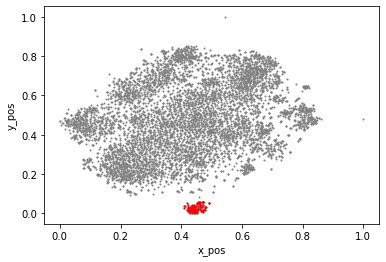

In [21]:
ax = DF.plot(kind='scatter', x='x_pos', y='y_pos', s=1, color='grey')

DF [  (DF.y_pos < 0.08) 
   ].plot(ax=ax, kind='scatter', x='x_pos', y='y_pos', color='red', s=1)

In [22]:
print(DF[(DF.y_pos < 0.08)].img.to_list())

['P004195', 'P000668', 'P007729', 'P000536', 'P007066', 'P002863', 'P000669', 'P000866', 'P004194', 'P004196', 'P006554', 'P007919', 'P004034', 'P007461', 'P003820', 'P000901', 'P002864', 'P003978', 'P006627', 'P002468', 'P004541', 'P004227', 'P002865', 'P008227', 'P005924', 'P004186', 'P007499', 'P003204', 'P003007', 'P004230', 'P002866', 'P006553', 'P004608', 'P008055', 'P004280', 'P007575', 'P004322', 'P003317', 'P002009', 'P002547', 'P004122', 'P003315', 'P001489', 'P002619', 'P003922', 'P007562', 'P003923', 'P002546', 'P004682', 'P004457', 'P004325', 'P003304', 'P007573', 'P004324', 'P004481', 'P008046', 'P004695', 'P005992', 'P004332', 'P000168', 'P002390', 'P003065', 'P002391', 'P002636', 'P003460', 'P002959', 'P007192', 'P004316', 'P007794', 'P004510', 'P004276', 'P005419', 'P004277', 'P005974', 'P008049', 'P004467', 'P008103', 'P007345', 'P002598', 'P004476', 'P006275', 'P002167', 'P004701', 'P007585', 'P002548', 'P002789', 'P004313', 'P004273', 'P008105', 'P003441', 'P004474'

In [33]:
get_bbox(DF [ (DF.y_pos < 0.08) ] )

{'x0': 0.40803677, 'x1': 0.49285450000000003, 'y0': 0.0, 'y1': 0.060194686}

Zoom na região dos trípticos e painéis, com as 50 obras do entorno de “Tríptico del jardín de las delicias” (P002823)

In [23]:
print(get_n_closest_images(DF, "P002823", 50).img.to_list())

['P002823', 'P002052', 'P001306', 'P007757', 'P008121', 'P008184', 'P001321', 'P004223', 'P002217', 'P002223', 'P001332', 'P002048', 'P002545', 'P001336', 'P002677', 'P008106', 'P003782', 'P008116', 'P008117', 'P002536', 'P001327', 'P002666', 'P001510', 'P002535', 'P001291', 'P003055', 'P001916', 'P001931', 'P002494', 'P001888', 'P007097', 'P002703', 'P002538', 'P007635', 'P000015', 'P002552', 'P001333', 'P003150', 'P001361', 'P008125', 'P001330', 'P008118', 'P005165', 'P007238', 'P000474', 'P008119', 'P000577', 'P002685', 'P002841', 'P002842']


In [34]:
get_bbox(get_n_closest_images(DF, "P002823", 50))

{'x0': 0.63244873, 'x1': 0.69665873, 'y0': 0.29236802, 'y1': 0.35260993}

Zoom na área de 20 imagens ao redor de “David vencedor de Goliat” (P000065). Destaca as três obras citadas acima. 

In [24]:
print(get_n_closest_images(DF, "P000065", 20).img.to_list())

['P000065', 'P005514', 'P004692', 'P006436', 'P007990', 'P000071', 'P003048', 'P000338', 'P006859', 'P006028', 'P000395', 'P003784', 'P000518', 'P001246', 'P001244', 'P006534', 'P007593', 'P001971', 'P007849', 'P001862']


In [35]:
get_bbox(get_n_closest_images(DF, "P000065", 20))

{'x0': 0.17592323, 'x1': 0.21179608, 'y0': 0.6433623, 'y1': 0.6739533000000001}

15 principais obras do museu:

1. As meninas - Diego Velázquez - 'P001174'

2. O Jardim das Delícias Terrenas - Bosch (El Bosco) - 'P002823'

3. A anunciação - Fra Angelico - 'P000015'

4. O cardeal - Rafael - 'P000299'

5. O Imperador Carlos V a Cavalo em Mulhberg l - Ticiano - 'P000410'

6. David e Golias - Caravaggio - 'P000065'

7. O Lavapés - Tintoretto - 'P002824'

8. A mão do cavaleiro em seu peito - El Greco - 'P000809'

9. O sonho de Jacob - José de Ribera - 'P001117'

10. As Três Graças - Rubens - 'P001670'

11. 3 de Maio de 1808 em Madrid - Goya - 'P000749'

12. Aparição do Apóstolo São Pedro a São Pedro Nolasco - Zurbarán - 'P001237'

13. El Parnaso - Poussin - 'P002313'

14. Dona Isabel a Católica ditando seu testamento - Eduardo Rosales - 'P004625'

15. O Triunfo da Morte - Pieter Brugel - 'P001393' 

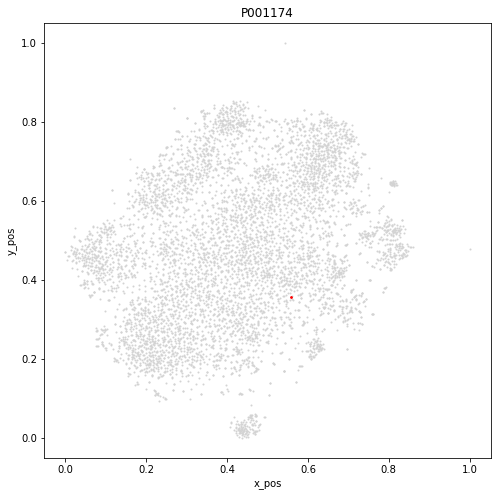

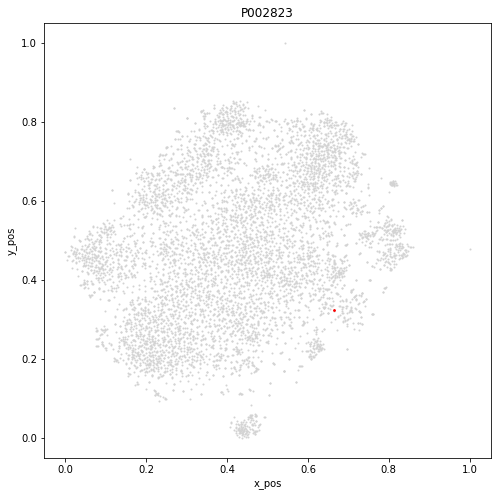

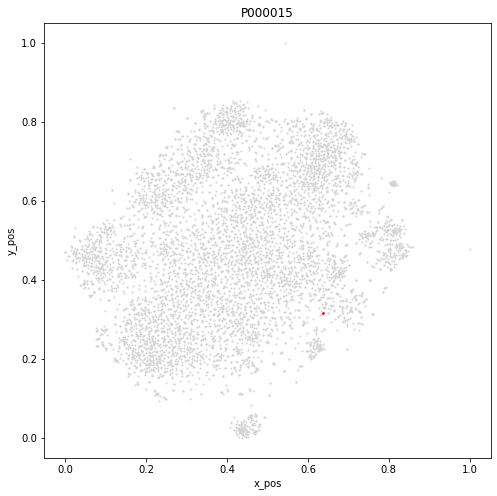

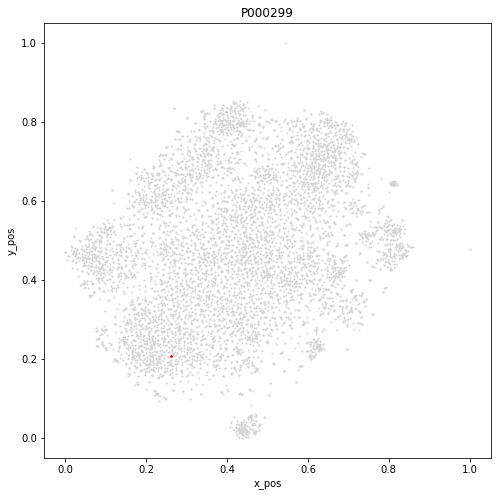

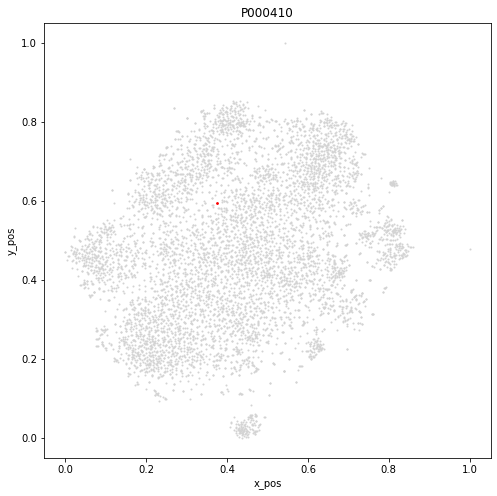

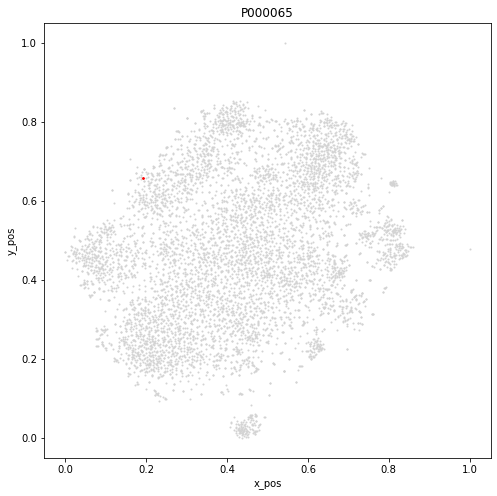

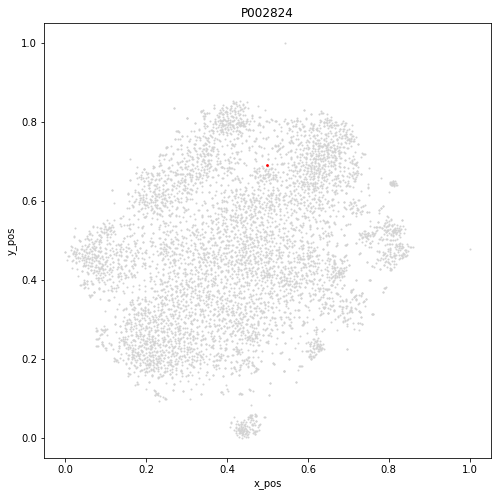

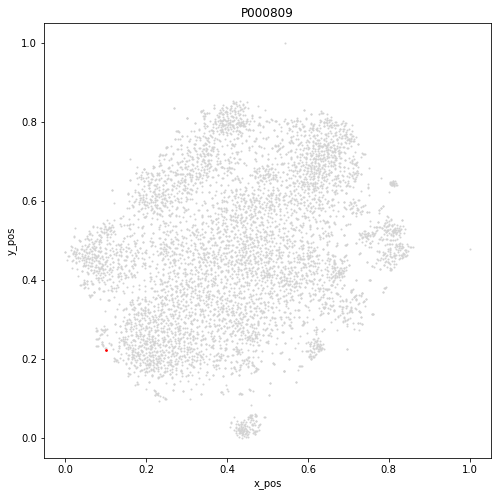

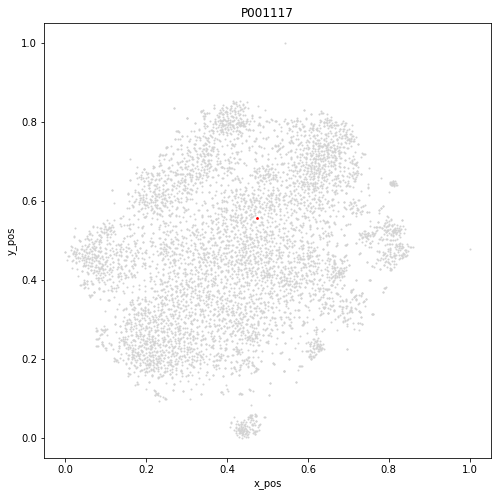

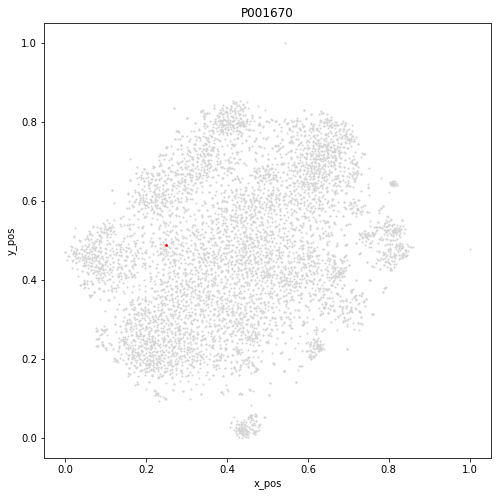

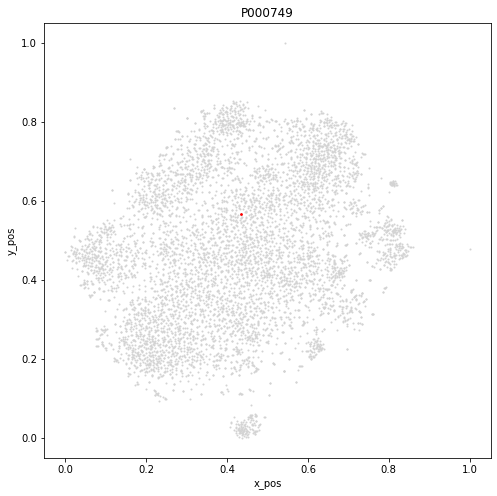

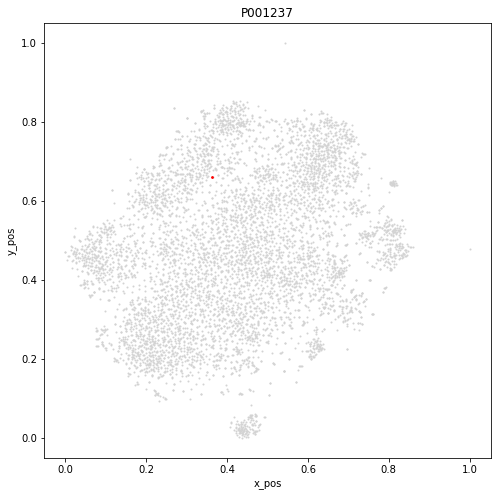

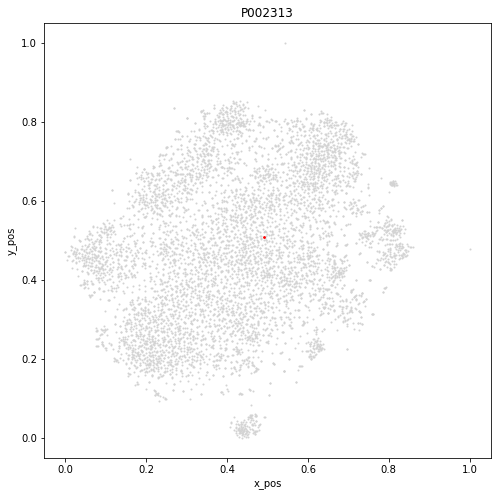

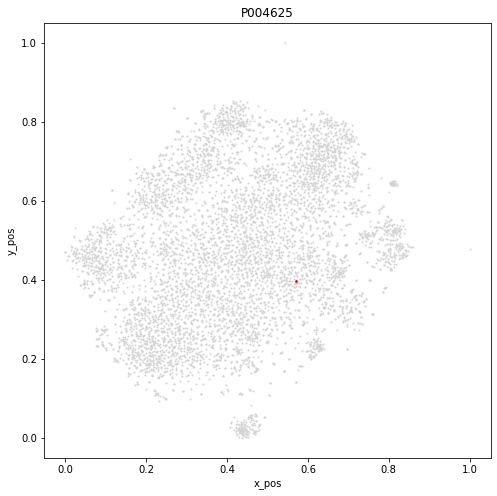

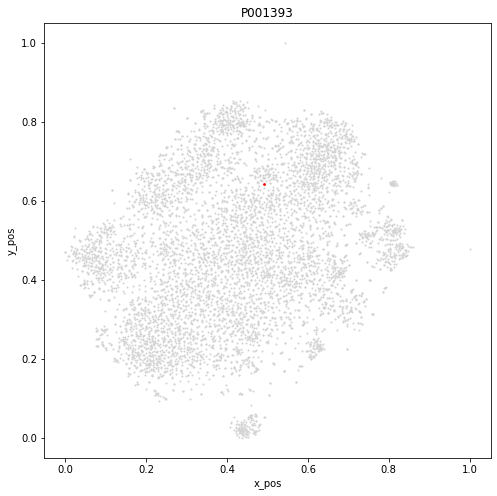

In [42]:
for img in ["P001174", "P002823", "P000015", "P000299",
            "P000410", "P000065", "P002824", "P000809", 
            "P001117", "P001670", "P000749", "P001237", 
            "P002313", "P004625", "P001393"]:
    
    ax = DF.plot(kind = 'scatter',
                 x = "x_pos",
                 y = "y_pos",
                 s = 1,
                 color = 'lightgrey',
                 figsize = (8,8))
    
    DF [ DF.img == img ].plot(kind = 'scatter',
                 x = "x_pos",
                 y = "y_pos",
                 s = 3,
                 color = 'red',
                 ax = ax)
    
    ax.set_title(img)
